# COMP47700 Speech and Audio: Project
### CPR BEAT DETECTION FROM AUDIO

Hand CPR requires repeated chest compressions at a rate of 100 to 120 times a minute until an ambulance arrives or for as long as you can. This project allows the general public to upload music or any audio and find portions of song/audio that can be used to perform CPR to, if it exists. This will allow people from all backgrounds (not only English language speakers) to know music from their native language that can be kept in mind while doing CPR for ease.

### Audio songs available for checking

#### English
* EnglighCPRSongFilename1 = "Bee Gees - Stayin Alive.mp3"
* EnglighCPRSongFilename2 = "Queen - Another One Bites The Dust.mp3"
* RandomNonCPREnglishSongFilename1 = "MAGIC! - Rude.mp3"
* RandomNonCPREnglishSongFilename2 = "I'm Yours - Jason Mraz.mp3"

#### Spanish
* SpanishCPRSongFilename1 = "Shakira - Hips Don't Lie.mp3"
* SpanishCPRSongFilename2 = "Daddy Yankee - Gasolina.mp3"
* RandomNonCPRSpanishSongFilename1 = "A Thousand Years - Spanish.mp3"
* RandomNonCPRSpanishSongFilename2 = "Enrique Iglesias - Cuando Me Enamoro.mp3"
* RandomNonCPRSpanishSongFilename3 ="No Hay Nada.mp3"
* RandomNonCPRSpanishSongFilename4 = "Los Del Rio - La Macarena.mp3"

#### Korean
* KoreanCPRSongFilename1 = "EXO Tempo.mp3"
* KoreanCPRSongFilename2 = "IKON - LOVE SCENARIO.mp3"
* RandomNonCPRKoreanSongFilename1 = "Monsta X - MIDDLE OF THE NIGHT.mp3"
* RandomNonCPRKoreanSongFilename2 = "ITZY.mp3"

In [1]:
import matplotlib.pyplot as plt
import IPython.display as ipd
from IPython.display import display
import os
import math
import ffmpeg
import librosa
import time
from IPython.display import Audio

### Function that checks if tempo of the audio clip is suitable to perform CPR or not

In [2]:
def canPerformCPR(tempo):
    if tempo>=100 and tempo<=120:
        return True
    else:
#         print("Audio bpm(beats per minute) " + str(tempo) + " not suitable to perform CPR to")
        return False

### Function to plot graph of changing or unchanging tempo for the window of time that is being checked. The graph contains start time of window in x axis and corresponding tempo in of the window of audio analysed in the y axis

In [3]:
# plot tempo of audio for each window check
def plotMovingWindowDetails(startTime_toTempoMapping):
    if startTime_toTempoMapping:
        fig1=plt.figure(figsize=(8, 6))
        plt.scatter(startTime_toTempoMapping[0], startTime_toTempoMapping[1])
        plt.grid(axis='both')
        plt.xlabel('start time in seconds')
        plt.ylabel('tempo')
        plt.show()

### Strategy 4 - If average bpm of a clip is lesser than expected CPR beats, then instead of moving per second move a whole minute

In [4]:
def strategy4(fname_wav):
    # librosa getduration avoids loading the contents into memory, and is therefore useful for querying the duration of long files.
    end_index = librosa.get_duration(filename=fname_wav) # result is in seconds
    
    # reject fast
    if end_index < 120:
        print("length of audio less than 2mins")
        return
    
    start3 = time.time() # to check load method time
    y, sr = librosa.load(fname_wav)
    print(f'Time taken by audio to load as signal using librosa load: {time.time() - start3}')
    
    
    max_offset_start_idx = math.floor(end_index - 2*60) # the last 2 minute's start index
    print("total duration of the audio: " + str(end_index/60) + " minutes")
    print("total number of maximum offsets: " + str(max_offset_start_idx))

    cpr_startTime = []
    cpr_endTime = []
    start_idx = 0
    prev_index = 0
    index = 0

    startTime_toTempoMapping = [[],[]] # to maintain start time to tempo information
    start2 = time.time() # to check time taken by librosa load method
    while index <= max_offset_start_idx:
        start4 = time.time() # to check iteration time
        ynew = y[sr*index:sr*(index+120)]

        tempo, beats = librosa.beat.beat_track(y=ynew, sr=sr, start_bpm=100)
        tempo = math.ceil(tempo)
        startTime_toTempoMapping[0].append(index)
        startTime_toTempoMapping[1].append(tempo)

        if canPerformCPR(math.ceil(tempo)):
            prev_index = index
            index = index + 1
        else:
            if start_idx != prev_index:
                cpr_startTime.append(start_idx)
                index = index + 1
                start_idx = index #assign new index
                cpr_endTime.append(prev_index+2*60)
                prev_index = index #assign new index
            else:
                index = index + 60
                start_idx = index #assign new index
                prev_index = index #assign new index
#         print(f'Time taken this iteration {time.time() - start4} ms')

    if prev_index != start_idx:
        cpr_startTime.append(start_idx)
        cpr_endTime.append((index-1)+2*60)
    
    if cpr_startTime:
        print("The optimal time intervals in the audio are as follows: ")
        for idx, startTime in enumerate(cpr_startTime):
            print(str(startTime) + " - " + str(cpr_endTime[idx]))
    else:
        print("Audio not suitable to perform CPR")
        
    return startTime_toTempoMapping

### Files used for testing the strategies

In [5]:
## English
Filename1 = 'Bee Gees - Stayin Alive.mp3'
Filename5 = "I'm Yours - Jason Mraz.mp3"

## Spanish
Filename3 = "Daddy Yankee - Gasolina.mp3"
Filename2 = "Enrique Iglesias - Cuando Me Enamoro.mp3"

## Korean
Filename4 = "IKON - LOVE SCENARIO.mp3"

# Assigning file to be tested
start1 = time.time()
songFileName = Filename4
fname_wav = 'demofile.wav'

# Delete wav file generated previously under the same name
if os.path.exists("demofile.wav"):
    os.remove("demofile.wav")
else:
    print("The file does not exist")

# Convert to wav file
start2 = time.time()
stream = ffmpeg.input(songFileName)
stream = ffmpeg.output(stream, fname_wav)
print(f'wav format conversion time taken: {time.time() - start2}')
ffmpeg.run(stream)

The file does not exist
wav format conversion time taken: 0.00029587745666503906


ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with Apple clang version 14.0.0 (clang-1400.0.29.202)
  configuration: --prefix=/usr/local/Cellar/ffmpeg/5.1.2_6 --enable-shared --enable-pthreads --enable-version3 --cc=clang --host-cflags= --host-ldflags= --enable-ffplay --enable-gnutls --enable-gpl --enable-libaom --enable-libaribb24 --enable-libbluray --enable-libdav1d --enable-libmp3lame --enable-libopus --enable-librav1e --enable-librist --enable-librubberband --enable-libsnappy --enable-libsrt --enable-libsvtav1 --enable-libtesseract --enable-libtheora --enable-libvidstab --enable-libvmaf --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lzma --enable-libfontconfig --enable-libfreetype --enable-frei0r --enable-libass --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libspeex --enable-libsoxr --enable-libzmq --enable-libzimg --disable-libjack --

(None, None)

Time taken by audio to load as signal using librosa load: 5.7977399826049805
total duration of the audio: 3.5286591080876795 minutes
total number of maximum offsets: 91
The optimal time intervals in the audio are as follows: 
0 - 211


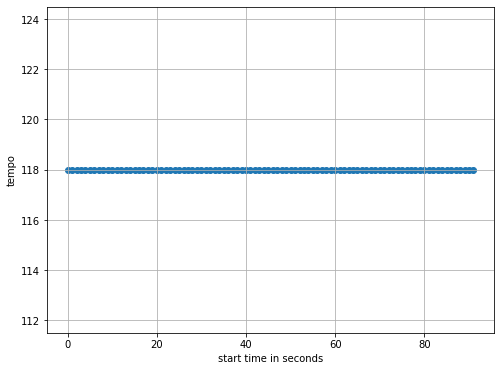

Time taken for this CPR beat finding algorithm to complete: 56.927160024642944 sec


In [7]:
start = time.time()
# CPR beat finding algorithm for strategy 4 ends here
startTime_toTempoMapping = strategy4(fname_wav)
plotMovingWindowDetails(startTime_toTempoMapping)
# CPR beat finding algorithm for strategy 4 ends here
print(f'Time taken for this CPR beat finding algorithm to complete: {time.time() - start} sec')

### References
1:20 - 0:25
display(Audio(y, rate=sr))
* [1] Anonymous 15 March 2022, *nhs website*, accessed 16 April 2023, <https://www.nhs.uk/conditions/first-aid/cpr/>
* Anonymous 5 March 2022, youtube Fire Department Chronicles channel, accessed 20 April 2023, <https://www.youtube.com/watch?v=0H_XUaxrna8>
* Spanish song reference - https://www.newscientist.com/article/mg23831822-900-feedback-humming-this-spanish-pop-song-might-save-a-life/
* Librosa.getduration - https://librosa.org/doc/latest/generated/librosa.get_duration.html#librosa.get_duration